In [5]:
import pandas as pd
import re
import numpy as np
from sklearn import tree

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [6]:
# df = pd.read_csv('./InputData/winemag-data-130k-v2.csv')
# df.head()
df = pd.read_csv('./InputData/clean_rm_blank_nan_data.csv')
df.head()

FileNotFoundError: File b'./InputData/clean_rm_blank_nan_data.csv' does not exist

In [119]:
df.isnull().any()

Unnamed: 0               False
country                  False
description              False
designation              False
points                   False
price                    False
province                 False
region_1                 False
region_2                 False
taster_name              False
taster_twitter_handle    False
title                    False
variety                  False
winery                   False
number_label             False
dtype: bool

In [121]:
print(df.describe())

          Unnamed: 0        points         price  number_label
count   19025.000000  19025.000000  19025.000000  19025.000000
mean    65896.804520     89.648042     43.032484      7.272641
std     37549.880047      2.835567     30.838047      4.737977
min         4.000000     80.000000      4.000000      0.000000
25%     33731.000000     88.000000     25.000000      3.000000
50%     66731.000000     90.000000     38.000000      5.000000
75%     98558.000000     92.000000     52.000000     11.000000
max    129950.000000    100.000000   2013.000000     19.000000


In [122]:
df.dtypes

Unnamed: 0                int64
country                  object
description              object
designation              object
points                    int64
price                     int64
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
number_label              int64
dtype: object

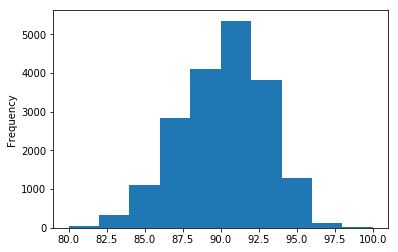

In [123]:
df['points'].plot.hist()
plt.show()

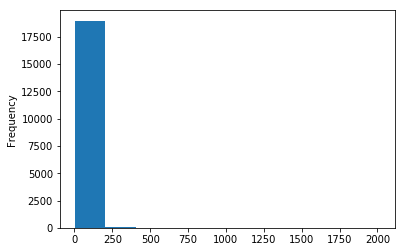

In [124]:
df['price'].plot.hist()
plt.show()

In [8]:
#sns.pairplot(df, hue='Species')

In [125]:
df.drop(df.columns[[0]], axis=1, inplace=True) # ditch that unnamed row numbers column
df.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
count,19025,19025,19025,19025.000000,19025.000000,19025,19025,19025,19025,19025,19025,19025,19025,19025.000000
unique,1,17408,8325,NaN,NaN,4,169,17,11,11,17350,16,2661,NaN
top,US,"Cigar box, café au lait, and dried tobacco aro...",Reserve,NaN,NaN,California,Columbia Valley (WA),Columbia Valley,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Columbia Crest,NaN
freq,19025,3,655,NaN,NaN,10932,2140,4572,5663,5663,6,4788,134,NaN
mean,NaN,NaN,NaN,89.648042,43.032484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.272641
std,NaN,NaN,NaN,2.835567,30.838047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737977
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,90.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,92.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [126]:
def add_label(variety):
    num = ""
    if variety=='White Blend':
        num = 0       
    elif variety=='Portuguese Red':
        num = 1 
    elif variety=='Pinot Gris': 
        num = 2
    elif variety=='Pinot Noir':
        num = 3 
    elif variety=='Cabernet Sauvignon': 
        num = 4
    elif variety=='Chardonnay':
        num = 5 
    elif variety=='Malbec': 
        num = 6
    elif variety=='Red Blend':
        num = 7 
    elif variety=='Merlot': 
        num = 8
    elif variety=='Sauvignon Blanc':
        num = 9 
    elif variety=='Sangiovese': 
        num = 10
    elif variety=='Bordeaux-style Red Blend':
        num = 11 
    elif variety=='Rosé': 
        num = 12
    elif variety=='Zinfandel':
        num = 13 
    elif variety=='Syrah': 
        num = 14
    elif variety=='Nebbiolo':
        num = 15 
    elif variety=='Rhône-style Red Blend': 
        num = 16
    elif variety=='Sparkling Blend': 
        num = 17
    elif variety=='Tempranillo':
        num = 18 
    elif variety=='Riesling': 
        num = 19
    return num
 

In [127]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [128]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [129]:
# df=df.fillna()
# df.head()

In [14]:
# df.replace(to_replace=['^','/','s'], value=np.nan, regex=True, inplace=True)
# df.head()

In [15]:
# Replace all the empty cells in dataframe with numpy NAN
 
# df["points"].replace(r'^\s*$', np.nan, regex=True, inplace = True)
# df["price"].replace(r'^\s*$', np.nan, regex=True, inplace = True)
# df.head()

In [130]:
len(df)

19025

In [131]:
# # drop rows with missing values
df.dropna(how="any", inplace=True) # Remove the rows with missing data
df.count() 

# # summarize the number of rows and columns in the dataset
print(df.shape) 

(19025, 14)


In [132]:
df.isnull().head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
df["number_label"] = df.variety.apply(add_label)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,4
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,8
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,3
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3


In [134]:
varieties = df['variety'].value_counts()
varieties.head()

Pinot Noir            4788
Chardonnay            2407
Cabernet Sauvignon    2372
Red Blend             1803
Syrah                 1678
Name: variety, dtype: int64

In [135]:
top_wine_df = df.loc[df['variety'].isin(varieties.axes[0][:20])] # first column[0],  rows :20 
top_wine_df["variety"].describe()

count          19025
unique            16
top       Pinot Noir
freq            4788
Name: variety, dtype: object

In [136]:
top_wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,4
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,8
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,3
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3


In [137]:
target = top_wine_df["number_label"]
target.head()

0    3
1    4
2    8
3    3
4    3
Name: number_label, dtype: int64

In [138]:
len(target)

19025

In [139]:
data = top_wine_df.drop("number_label", axis=1)
feature_names = data.columns
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [140]:
# data = top_wine_df[["country","designation","points", "price","province", "variety","region_1","region_2", "winery"]]  
# feature_names = data.columns
# feature_names
# #data.head()
 

In [141]:
data.head()
#len(data)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


# Tranforming the data with LabelEncoder

Creating a custom encoder involves simply creating a class that responds to the fit(), transform(), and fit_transform() methods. In this case, a good start might be something like this:

In [142]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 

In [143]:
# Create wine data in a Pandas dataframe
# data = top_wine_df.drop("number_label", axis=1) 
# features = data.columns
#target = top_wine_df["number_label"]

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [144]:
MultiColumnLabelEncoder(columns = features).fit_transform(top_wine_df).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255,3
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281,4
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263,8
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439,3
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812,3


In [145]:
top_wine_df["number_label"].head()

0    3
1    4
2    8
3    3
4    3
Name: number_label, dtype: int64

In [146]:
MultiColumnLabelEncoder().fit_transform(top_wine_df.drop("number_label", axis=1)).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812


In [147]:
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=["country","description","designation","points","price","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery"]))
    # add more pipeline steps as needed
])
encoding_pipeline.fit_transform(top_wine_df)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255,3
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281,4
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263,8
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439,3
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812,3
5,0,10168,2371,6,93,0,81,6,10,6,11354,1,1688,4
6,0,11467,2984,6,21,0,123,1,4,3,13713,11,2096,9
7,0,309,3459,6,41,3,32,3,8,8,1475,0,215,11
8,0,2744,4990,6,35,0,1,12,10,6,5210,1,770,4
9,0,6650,645,6,69,0,54,6,10,6,7224,1,1109,4


In [148]:
data = MultiColumnLabelEncoder().fit_transform(top_wine_df.drop("number_label", axis=1))



In [149]:
# target = top_wine_df["number_label"].head()
# target_df = target.to_frame().reset_index()
# target_df["number_label"]
# target

In [150]:
# target = MultiColumnLabelEncoder().fit_transform(top_wine_df.drop(top_wine_df.columns[[0, 12]], axis=1))  
target = target_pd["number_label"] 

 

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=36)
 

In [152]:
type(target)

pandas.core.series.Series

In [153]:
type(data)

pandas.core.frame.DataFrame

In [154]:
X_train.to_csv("X_train.csv")

In [155]:
top_wine_df.to_csv("target.csv")

In [156]:
#target.to_csv("target.csv")

In [158]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

1.0

# DecisionTreeClassifier

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [162]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [167]:
data = top_wine_df.drop("number_label", axis=1)
feature_names = data.columns
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [173]:
target_names = top_wine_df["variety"].unique()
target_names
  

array(['Pinot Noir', 'Cabernet Sauvignon', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Zinfandel', 'Red Blend',
       'Rhône-style Red Blend', 'Syrah', 'Riesling', 'Chardonnay',
       'White Blend', 'Sparkling Blend', 'Malbec', 'Rosé', 'Pinot Gris'], dtype=object)

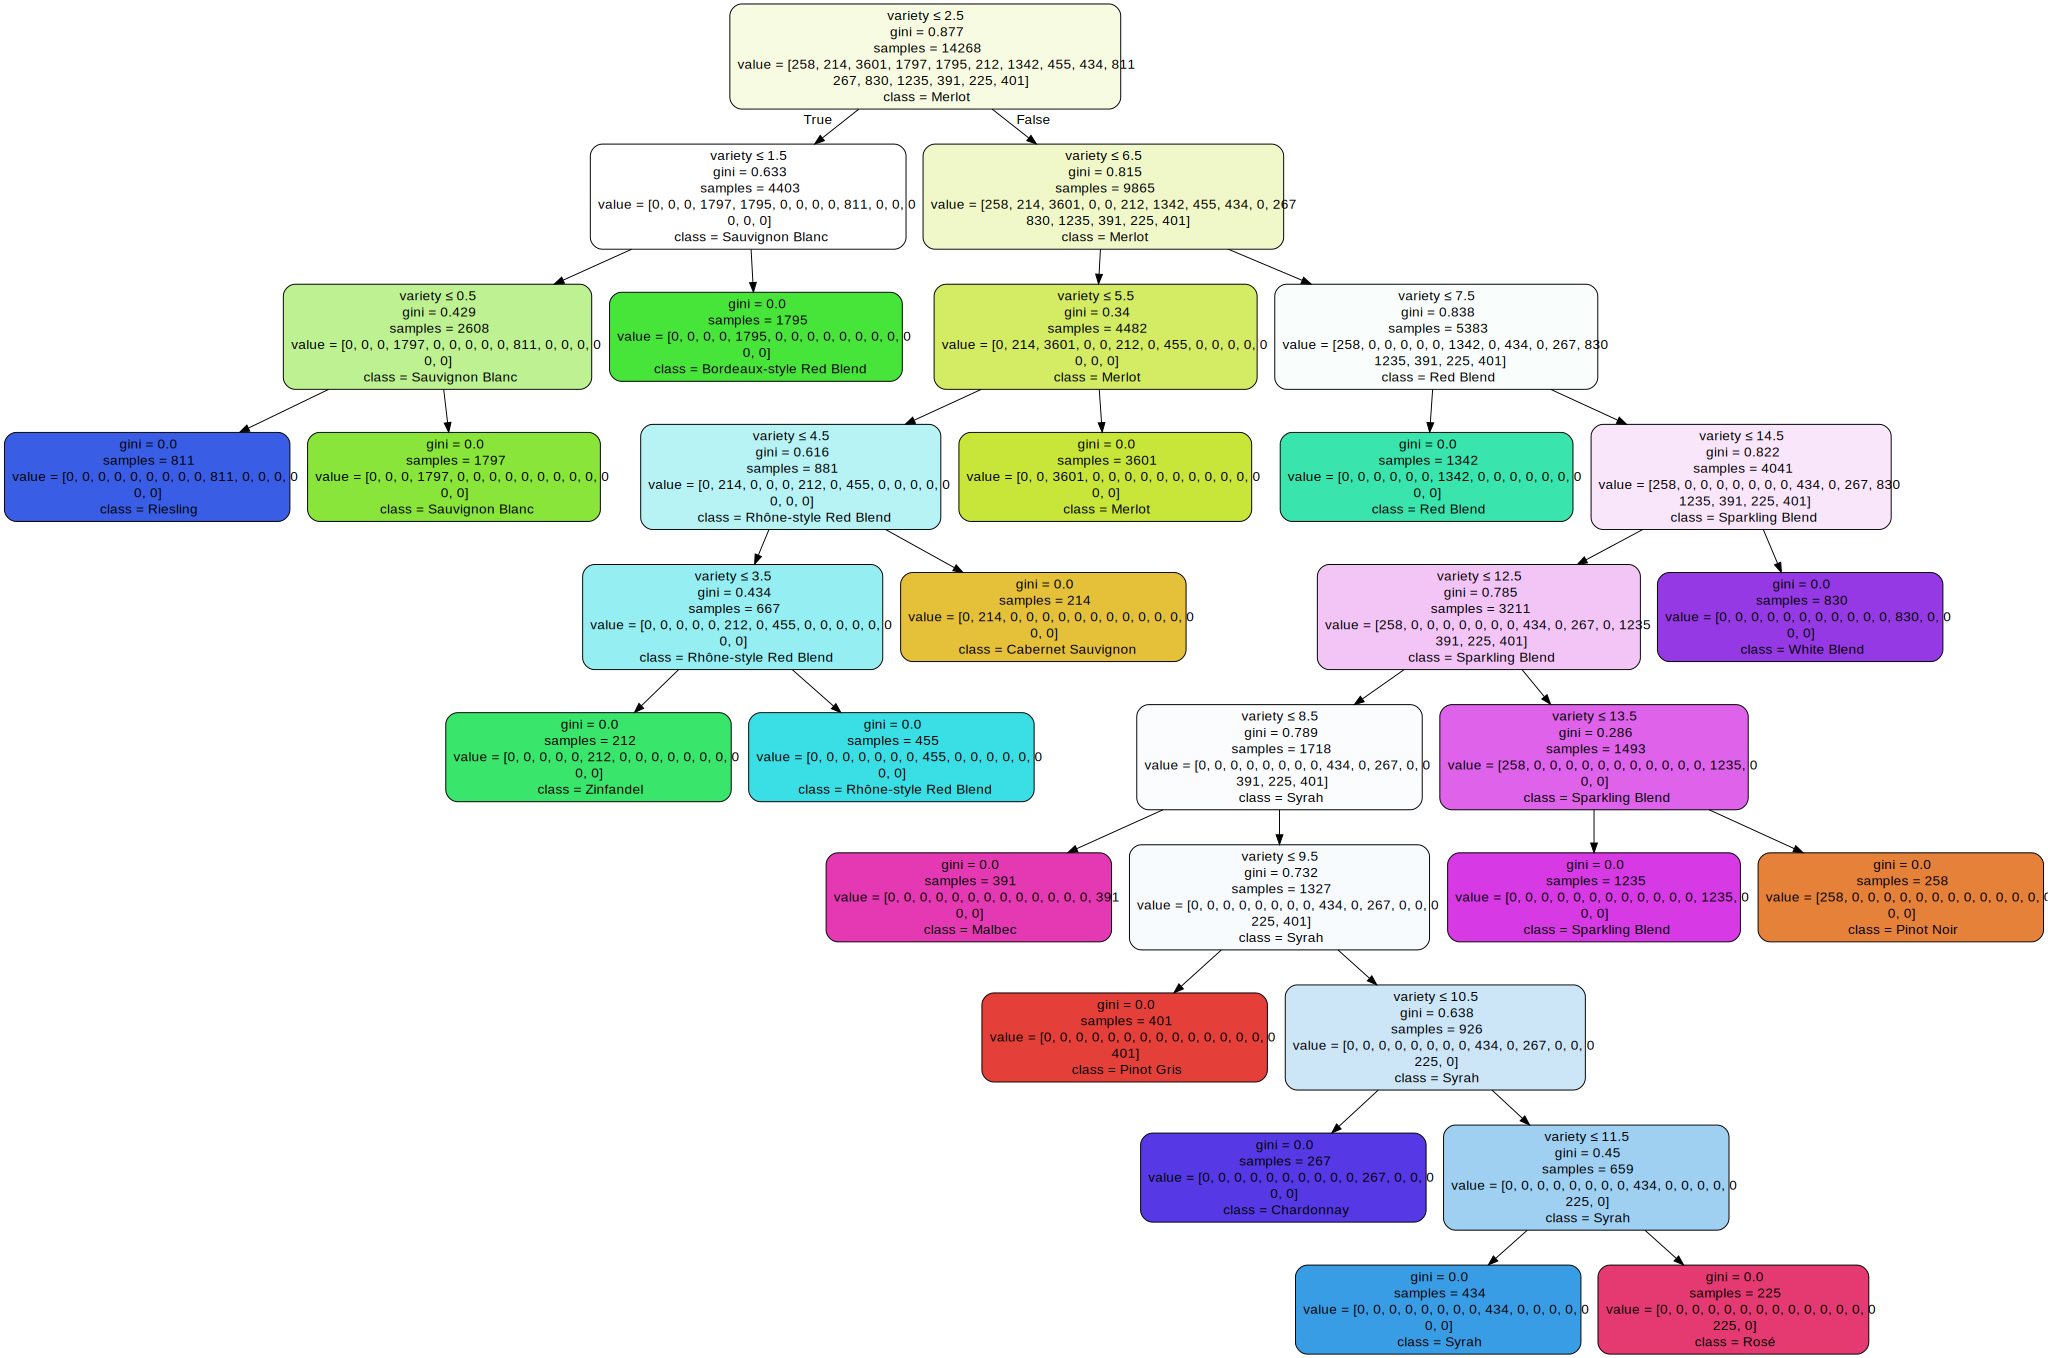

In [174]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

TypeError: Argument 'obj' has incorrect type (expected list, got DataFrame)

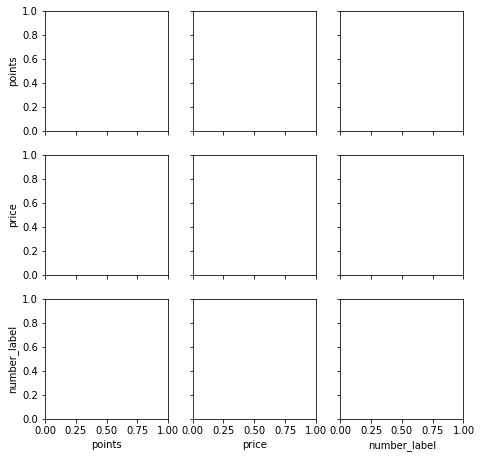

In [182]:
sns.pairplot(df, hue=feature_names)

# This is debugging

In [165]:
# predictions = clf.predict(X_test)

In [176]:
# test_data = ['tart', "floral", 'smooth', "sweet"]
# test_prediction = vect.transform(test_data)

In [177]:
# clf.predict(test_prediction)

In [ ]:
# le.classes_[clf.predict(test_prediction)]

In [ ]:
# clf.predict_proba(test_prediction)

# RandomForestClassifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.98192137902039101

In [180]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.58459271730959728, 'variety'),
 (0.070301122387164267, 'price'),
 (0.052090261262664618, 'region_2'),
 (0.048678560837458716, 'region_1'),
 (0.043329157879483188, 'designation'),
 (0.039962095578283757, 'title'),
 (0.037346953707085968, 'description'),
 (0.035949018430496381, 'winery'),
 (0.030047987315575321, 'province'),
 (0.028944534532793019, 'points'),
 (0.01450221548721441, 'taster_twitter_handle'),
 (0.01425537527218333, 'taster_name'),
 (0.0, 'country')]